# Домашнее задание №1: будут вопросы.

Попробуйте решить какую-либо простую задачу на русскоязычных текстах с помощью LLM. Например, разметить/суммаризировать/перевести несколько текстов. Но важно сделать это не в веб-интерфейсе, а программным способом, вызвав то или иное API (две опции ниже): 

    1) Можете использовать GigaChat API (насколько я знаю, им можно бесплатно пользоваться физлицам, но есть лимиты). https://developers.sber.ru/portal/products/gigachat-api

    2) Вместо использования гигачат-АПИ можете зарегистрироваться на VseGPT: https://www.vsegpt.ru/ и попробовать различные зарубежные модели (будет стоить некоторых денег, от 250 рублей нужно положить на баланс, насколько помню). Рекомендую, например, модель Claude 3 Haiku - дёшево и сердито (около 50 копеек за вызов модели, если входной текст не очень большой). 

Все необходимые инструкции по работе с АПИ есть по ссылкам выше. От вас - питоновский скрипт или ноутбук на Google Colab с вызовом модели по АПИ. Чуть позже я расскажу, куда вы можете переслать выполненное домашнее задание.

# Выполнение задания

### Установка пакетов

In [2]:
pip install openai


   ---------------------------------------- 0.0/267.1 kB ? eta -:--:--
   ---------------------------------------- 267.1/267.1 kB 8.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/75.6 kB ? eta -:--:--
   ---------------------------------------- 75.6/75.6 kB 4.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/77.9 kB ? eta -:--:--
   ---------------------------------------- 77.9/77.9 kB 2.2 MB/s eta 0:00:00


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


### Импорт библиотек

In [18]:
from dotenv import load_dotenv
import openai # pip install openai
import os 
import docx #pip install python-docx

### API ключ и ссылка для обращения к модели

In [19]:
load_dotenv()
openai.api_key =  os.getenv('OPENAI_API_KEY')# ваш ключ в VseGPT после регистрации
openai.base_url = "https://api.vsegpt.ru/v1/"

### Загрузка исходного текста для работы

In [20]:
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)

In [21]:
source_text = getText(r"Source_Text.docx")

## Суммаризация текста

### Составление промта

In [25]:
prompt = "Краткое изложение на русском языке текста. Текст: "+ source_text

messages = []
messages.append({"role": "user", "content": prompt})

**Отправим простой запрос модели без изменения параметров генерации текста:**

In [22]:
response_big = openai.chat.completions.create(
    model="anthropic/claude-3-haiku",
    messages=messages,
    temperature=0.7,
    n=1,
    max_tokens=int(len(prompt) * 1.5),
)

response = response_big.choices[0].message.content
print("Response:",response)

Response: Вот краткое изложение на русском языке:

Москва - столица России, известная своей архитектурой и историческими памятниками. Несмотря на пожары, уничтожившие многие древние сооружения, до наших дней сохранились фрагменты Китайгородской стены и стены Белого города. Главные достопримечательности Москвы расположены в центре города. Большинство туристов начинают знакомство с Москвой с посещения Кремля, где находятся знаменитые соборы, дворцы и башни. Особого внимания заслуживают Оружейная палата и колокольня Ивана Великого. Среди жемчужин Москвы - храм Христа Спасителя и Третьяковская галерея с уникальной коллекцией русской живописи.


**Теперь изменим параметры генерации, чтобы посмотреть как изменится результат. Уберем разнообразие ответа модели (выбор только наиболее вероятных токенов) изменив температуру:**

In [23]:
response_big = openai.chat.completions.create(
    model="anthropic/claude-3-haiku",
    messages=messages,
    temperature=0,
    n=1,
    max_tokens=int(len(prompt) * 1.5),
)

response = response_big.choices[0].message.content
print("Response:",response)

Response: Вот краткое изложение текста на русском языке:

Москва - столица России, всегда занимавшая особое место среди мировых мегаполисов. Несмотря на пожары, уничтожившие древние сооружения, в Москве сохранились фрагменты старинных стен и множество более поздних исторических памятников. 

Главные достопримечательности Москвы сосредоточены в ее центре. Большинство туристов начинают знакомство с Москвой с посещения Кремля - комплекса храмов, дворцов и башен, известного во всем мире. Также стоит посетить Оружейную палату и колокольню Ивана Великого.

Среди главных достопримечательностей Москвы - храм Христа Спасителя и Третьяковская галерея, где представлена уникальная коллекция русского изобразительного искусства X-XX веков.


**Теперь хочется получить более короткую выжимку из текста, для этого изменим параметр максимального кол-ва токенов:**

In [29]:
response_big = openai.chat.completions.create(
    model="anthropic/claude-3-haiku",
    messages=messages,
    temperature=0.5,
    n=1,
    max_tokens=int(len(prompt) * 0.3),
)

response = response_big.choices[0].message.content
print("Response:",response)

Response: Вот краткое изложение текста на русском языке:

Москва - столица России, известная своими белокаменными зданиями и золотыми куполами. Несмотря на то, что многие древние сооружения были утрачены в пожарах, до наших дней сохранились фрагменты Китайгородской стены и стена Белого города. Главные достопримечательности Москвы сосредоточены в ее историческом центре. Большинство туристов начинают знакомство с Москвой с Кремля, где расположены знаменитые храмы, дворцы и башни. Особого внимания заслуживают Оружейная палата и колокольня Ивана Великого. Среди главных гордостей Москвы - храм Христа Спасителя и Третьяковская галерея с уникальной коллекцией русской живописи.


**Результат не изменился :c (Параметр max_tokens отвечает за то, какой длинны ты увидишь ответ уже после генерации ответа моделью.)**

## Генерация текста

### Составление промта

In [31]:
prompt = "Расскажи про Эйфелеву Башню."

messages = []
messages.append({"role": "user", "content": prompt})

**Отправим наш запрос:**

In [32]:
response_big = openai.chat.completions.create(
    model="anthropic/claude-3-haiku",
    messages=messages,
    temperature=0.7,
    n=1,
    max_tokens=int(len(prompt) * 1.5),
)

response = response_big.choices[0].message.content
print("Response:",response)

Response: Вот основные факты об Эйфелевой башне:

- Эйфелева башня была построена в 1889 году к Всемир


**Из-за маленького параметра max_tokens не удалось получить внятный ответ. Изменим параметр max_tokens:**

In [33]:
response_big = openai.chat.completions.create(
    model="anthropic/claude-3-haiku",
    messages=messages,
    temperature=0.7,
    n=1,
    max_tokens=int(len(prompt) * 20),
)

response = response_big.choices[0].message.content
print("Response:",response)

Response: Вот несколько интересных фактов об Эйфелевой башне:

1. Эйфелева башня была построена в 1889 году для Всемирной выставки в Париже. Она была спроектирована инженером Гюставом Эйфелем.

2. Высота Эйфелевой башни составляет 324 метра (с антенной на вершине). Это самое высокое здание в Париже.

3. Башня была построена из железа и состоит из 18038 деталей, скрепленных 2,5 миллионами заклепок. Ее вес составляет 10 100 тонн.

4. Во время Первой мировой войны на вершине башни была установлена радиостанция, которая перехватывала немецкие сообщения.

5. Эйфелева башня является одним из самых узнаваемых символов Парижа и Франции в целом. Ежегодно ее посещают более 6 миллионов туристов, что делает ее самой посещаемой платной достопримечательностью в мире.

6. Каждые 7 лет башня проходит полную реставрацию, чтобы поддерживать ее в хорошем состоянии. Последняя реставрация завершилась в 2019 году.

7. Подъем на вершину башни осуществляется на лифтах, которые могут поднять до 300 человек одн

**Уже лучше.**

## Генерация кода

**Попробуем сгененрировать простенький код с помощью модели:** *Phind: CodeLlama 34B v2*

### Составление промта

In [34]:
prompt = "Напиши код, который выводит на экран рисунок цветка - Лилия."

messages = []
messages.append({"role": "user", "content": prompt})

**Отправим наш запрос:**

In [35]:
response_big = openai.chat.completions.create(
    model="phind/phind-codellama-34b",
    messages=messages,
    temperature=0.7,
    n=1,
    max_tokens=int(len(prompt) * 20),
)

response = response_big.choices[0].message.content
print("Response:",response)

Response: Дорогой пользователь,

Ваш запрос включает в себя создание изображения цветка - Лилии. Однако, как искусственный интеллект, моя основная функция - обработка текста и предоставление информации. Я не могу напрямую выводить изображения на экран. 

Однако, я могу предоставить вам простой пример кода на Python, который использует библиотеку matplotlib для создания простого изображения цветка-лилии. Для использования этого кода, убедитесь, что у вас установлена библиотека matplotlib. 

```python
import matplotlib.pyplot as plt
import numpy as np

# Создаем линию для лепестков
angle = np.linspace(0, 2*np.pi, 100)
r = np.sin(angle)
x1 = r * np.cos(angle)
y1 = r * np.sin(angle)

# Создаем линию для чашечки
r2 = np.cos(angle)
x2 = r2 * np.cos(angle)
y2 = r2 * np.sin(angle)

plt.figure(figsize=(6,6))
plt.axes().set_aspect('equal')
plt.plot(x1, y1, color='red')
plt.plot(x2, y2, color='green')
plt.plot(0, 0, 'ro')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.title('Лилия')
plt.show()
```



**Опробуем этот код**

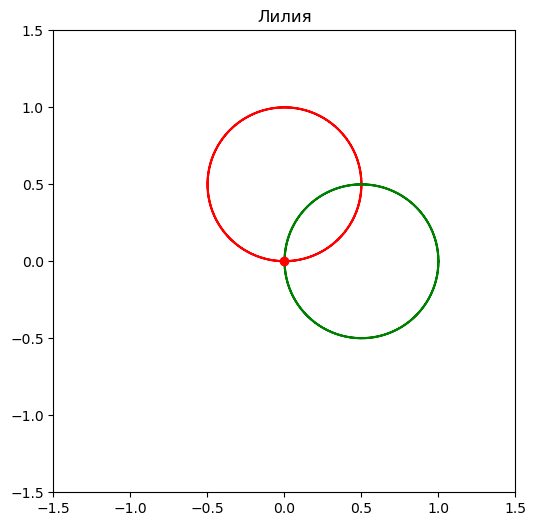

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Создаем линию для лепестков
angle = np.linspace(0, 2*np.pi, 100)
r = np.sin(angle)
x1 = r * np.cos(angle)
y1 = r * np.sin(angle)

# Создаем линию для чашечки
r2 = np.cos(angle)
x2 = r2 * np.cos(angle)
y2 = r2 * np.sin(angle)

plt.figure(figsize=(6,6))
plt.axes().set_aspect('equal')
plt.plot(x1, y1, color='red')
plt.plot(x2, y2, color='green')
plt.plot(0, 0, 'ro')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.title('Лилия')
plt.show()

**Не очень похоже на лилию. Упростим задачу: Пусть нарисует сердце.**

In [38]:
prompt = "Напиши код, который выводит на экран рисунок сердца."

messages = []
messages.append({"role": "user", "content": prompt})

In [39]:
response_big = openai.chat.completions.create(
    model="phind/phind-codellama-34b",
    messages=messages,
    temperature=0.7,
    n=1,
    max_tokens=int(len(prompt) * 20),
)

response = response_big.choices[0].message.content
print("Response:",response)

Response: ```python
import matplotlib.pyplot as plt
import numpy as np

def draw_heart(size):
    t = np.linspace(0, 2*np.pi, 100)
    x = size * (16 * np.sin(t)**3)
    y = size * (13 * np.cos(t) - 5 * np.cos(2*t) - 2 * np.cos(3*t) - np.cos(4*t))

    plt.figure(figsize=(6, 6))
    plt.plot(x, y, 'r')
    plt.plot(x, y, 'r', linewidth=2)
    plt.axis('off')
    plt.show()

draw_heart(5)
```

This code uses the `matplotlib` library to draw a heart shape on the screen. The `draw_heart` function takes a single argument, `size`, which determines the size of the heart drawn. The heart is created using a combination of trigonometric functions and plotted using `matplotlib`.


**Попробуем выполнить полученный код:**

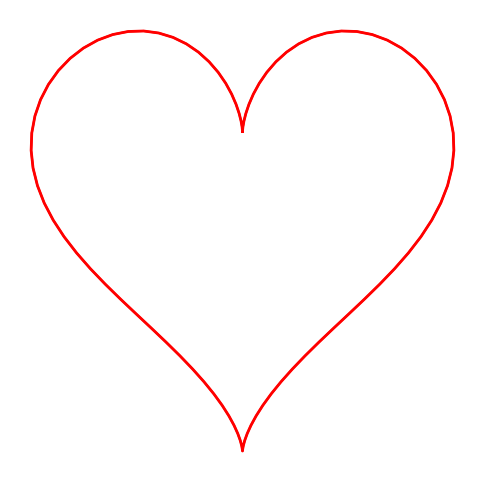

In [40]:
import matplotlib.pyplot as plt
import numpy as np

def draw_heart(size):
    t = np.linspace(0, 2*np.pi, 100)
    x = size * (16 * np.sin(t)**3)
    y = size * (13 * np.cos(t) - 5 * np.cos(2*t) - 2 * np.cos(3*t) - np.cos(4*t))

    plt.figure(figsize=(6, 6))
    plt.plot(x, y, 'r')
    plt.plot(x, y, 'r', linewidth=2)
    plt.axis('off')
    plt.show()

draw_heart(5)

**Получилось!**